In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
proyecto_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', delimiter=';')
proyecto_data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,NaN,1.62,64.0,no,no,2.0,NaN,no,no,2.0,yes,NaN,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,NaN,1.80,87.0,Frequently,no,3.0,NaN,no,no,2.0,no,NaN,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 1. Selección de Variables:
Variable a predecir: NObeyesdad, que indica el nivel de obesidad de las personas.

Variables predictoras: Entre las variables elegidas estan: 
 * Weight: Peso de las personas.
 * family_history_with_overweight: Indica si la personas tiene o tuvo familiareas con sobrepeso.
 * FAVC: Si la persona come alimentos ricos en calorias.
 * FCVC: Si la persona come vegetales.
 * NCP: Cuantas comidas principales hace al dia.
 * SCC: Si la persona controla las calorias que consume diariamente.
 * FAF: Con que frecuencia la persona hace ejercicio.
 * CALC: Frecuencia con que bebe alcohol las personas. 

### 2. Ingeniería de características:

a. Imputación de variables con data faltante:
  * Numérica

In [59]:
#Determinacion de nulos:
col_con_na = []
for col in proyecto_data.columns:
    porcentaje_faltante = proyecto_data[col].isnull().mean()
    if(porcentaje_faltante > 0):
        col_con_na.append(col)

col_con_na

['Age', 'Gender', 'Weight', 'FAVC', 'NCP', 'FAF', 'MTRANS']

In [60]:
#Proporcion de nulos:
proporcion_nulos = proyecto_data[col_con_na].isnull().mean()
proporcion_nulos

Age       0.050213
Gender    0.134060
Weight    0.050213
FAVC      0.028896
NCP       0.134060
FAF       0.134060
MTRANS    0.050213
dtype: float64

* Analisis CCA

In [61]:
#Extraer columnas numericas
cols_for_cca = [col for col in col_con_na if proyecto_data[col].dtype in ['float64']]
cols_for_cca

['Age', 'Weight', 'NCP', 'FAF']

In [62]:
#Imputacion por medio del CCA.
data_cca = proyecto_data[cols_for_cca].dropna()

In [63]:
data_cca.shape, proyecto_data.shape

((1742, 4), (2111, 17))

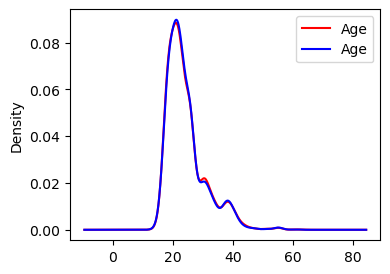

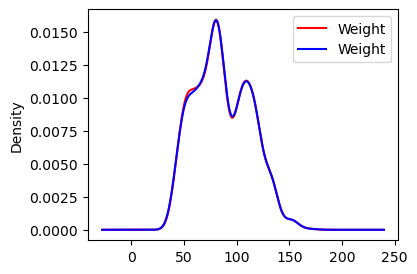

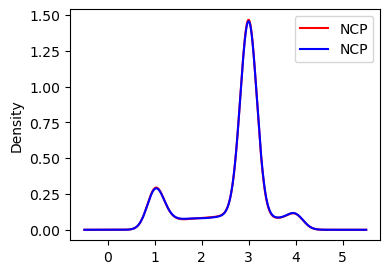

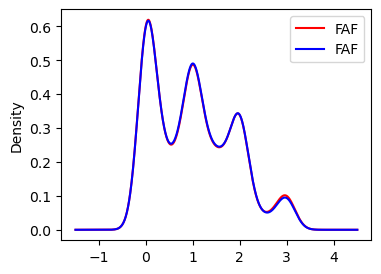

In [64]:
#Resultado de imputacion por CCA.

for col in cols_for_cca:
    fig = plt.figure(figsize=(4, 3))
    proyecto_data[col].plot.density(color='red', legend='Original')
    data_cca[col].plot.density(color='blue', legend='CCA')
    plt.show()

* Analisis Media

In [65]:
#Calculo para visualizar la media de cada columna numerica
medias = proyecto_data[cols_for_cca].mean()
medias

Age       24.342430
Weight    86.471125
NCP        2.684451
FAF        1.003579
dtype: float64

In [66]:
#Crear copia del dataset para imputacion de media
proyecto_data_media = proyecto_data.copy()
proyecto_data_media.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,NaN,1.62,64.0,no,no,2.0,NaN,no,no,2.0,yes,NaN,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,NaN,1.80,87.0,Frequently,no,3.0,NaN,no,no,2.0,no,NaN,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [67]:
#Imputacion de la media en las columnas numericas
for col in cols_for_cca:
    media_columna = proyecto_data_media[col].mean()
    proyecto_data_media[col] = proyecto_data_media[col].fillna(media_columna)

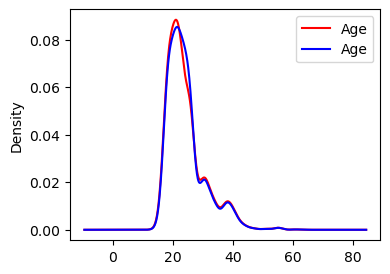

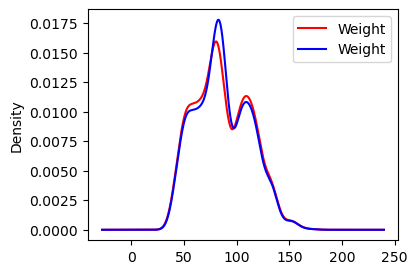

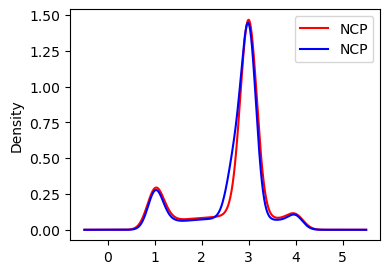

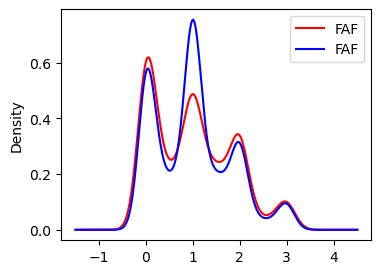

In [68]:
#Resultados de la imputación
for col in cols_for_cca:
    fig = plt.figure(figsize=(4, 3))
    proyecto_data[col].plot.density(color='red', legend='Original')
    proyecto_data_media[col].plot.density(color='blue', legend='Media')
    plt.show()

* Analisis Mediana

In [69]:
#Calculo de la mediana por cada columna numerica con datos nulos
medianas = proyecto_data[cols_for_cca].median()
medianas

Age       22.804818
Weight    82.636162
NCP        3.000000
FAF        1.000000
dtype: float64

In [70]:
proyecto_data_mediana = proyecto_data.copy()
proyecto_data_mediana.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,NaN,1.62,64.0,no,no,2.0,NaN,no,no,2.0,yes,NaN,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,NaN,1.80,87.0,Frequently,no,3.0,NaN,no,no,2.0,no,NaN,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [71]:
#Imputacion de la media en las columnas numericas
for col in cols_for_cca:
    mediana_columna = proyecto_data_mediana[col].median()
    proyecto_data_mediana[col] = proyecto_data_mediana[col].fillna(mediana_columna)

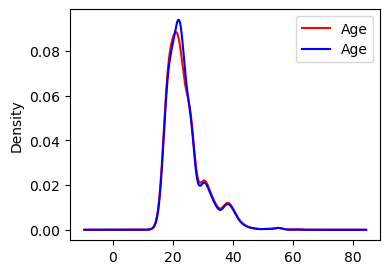

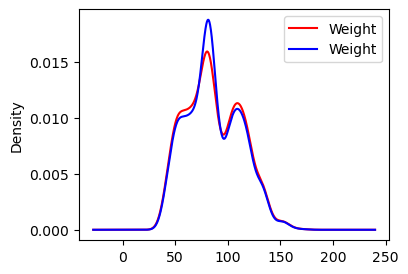

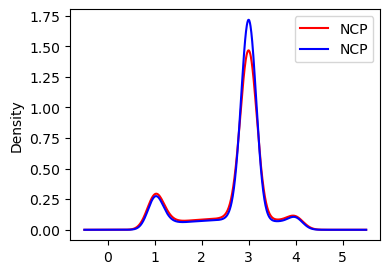

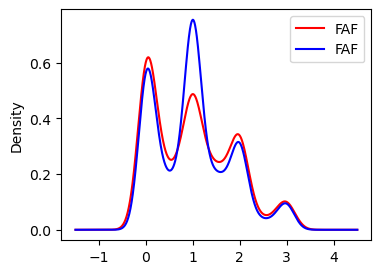

In [72]:
for col in cols_for_cca:
    fig = plt.figure(figsize=(4, 3))
    proyecto_data[col].plot.density(color='red', legend='Original')
    proyecto_data_mediana[col].plot.density(color='blue', legend='Media')
    plt.show()

R// Al realizar un analisis de los metodos de imputacion anterior para variables numericas, el mejor metodo es la de la media al tener levemente un mejor ajuste con relacion a la data original.

a. Imputación de variables con data faltante:
  * Categoricas

In [73]:
#Extraer variables categoricas con nulos.
categoricas = [col for col in col_con_na if proyecto_data_media[col].dtype == 'object']
categoricas

['Gender', 'FAVC', 'MTRANS']

In [74]:
#Analisis para la variable Gender.
proyecto_data_media['Gender'].value_counts(normalize=True).head(5)

Gender
Male      0.501094
Female    0.498906
Name: proportion, dtype: float64

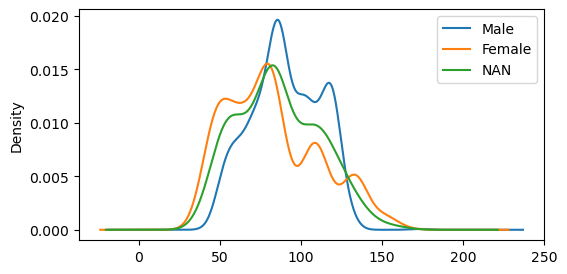

In [75]:
#Analisis por medio de grafica
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
proyecto_data_media[proyecto_data_media['Gender'] == 'Male' ]['Weight'].plot(kind='kde', ax=ax, label='Male')
proyecto_data_media[proyecto_data_media['Gender'] == 'Female' ]['Weight'].plot(kind='kde', ax=ax, label='Female')
proyecto_data_media[proyecto_data_media['Gender'].isnull()]['Weight'].plot(kind='kde', ax=ax, label='NAN')
plt.legend()
plt.show()

#Dado el resultado se considera adecuado imputar con una categoria de Missing

In [76]:
#Imputacion de la variable Gender con una nueva categoria 'Missing'.
proyecto_data_media['Gender'].fillna('Missing', inplace=True)

In [77]:
#Analisis para la variable FAVC.
proyecto_data_media['FAVC'].value_counts(normalize=True).head(5)

FAVC
yes    0.883902
no     0.116098
Name: proportion, dtype: float64

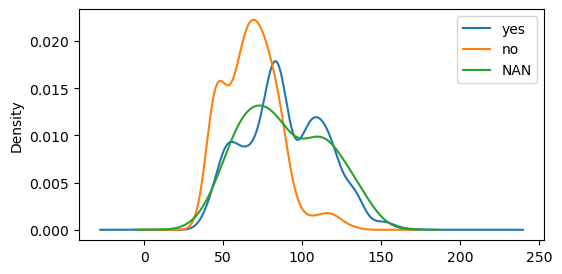

In [78]:
#Analisis por medio de grafica
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
proyecto_data_media[proyecto_data_media['FAVC'] == 'yes' ]['Weight'].plot(kind='kde', ax=ax, label='yes')
proyecto_data_media[proyecto_data_media['FAVC'] == 'no' ]['Weight'].plot(kind='kde', ax=ax, label='no')
proyecto_data_media[proyecto_data_media['FAVC'].isnull()]['Weight'].plot(kind='kde', ax=ax, label='NAN')
plt.legend()
plt.show()

#Dado el resultado se considera adecuado imputar con la categoria de yes

In [79]:
#Imputacion de la variable FAVC con 'yes'.
proyecto_data_media['FAVC'].fillna('yes', inplace=True)

In [80]:
#Analisis para la variable FAVC.
proyecto_data_media['MTRANS'].value_counts(normalize=True)

MTRANS
Public_Transportation    0.745636
Automobile               0.217955
Walking                  0.027431
Motorbike                0.005486
Bike                     0.003491
Name: proportion, dtype: float64

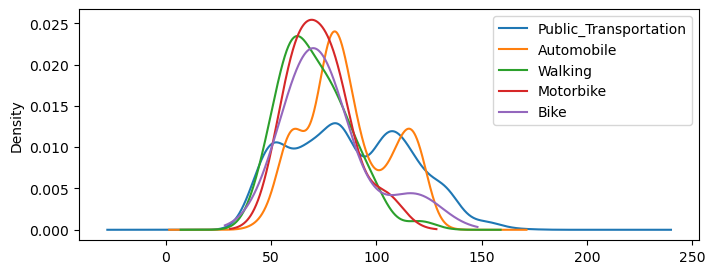

In [81]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Public_Transportation' ]['Weight'].plot(kind='kde', ax=ax, label='Public_Transportation')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Automobile' ]['Weight'].plot(kind='kde', ax=ax, label='Automobile')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Walking' ]['Weight'].plot(kind='kde', ax=ax, label='Walking')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Motorbike' ]['Weight'].plot(kind='kde', ax=ax, label='Motorbike')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Bike' ]['Weight'].plot(kind='kde', ax=ax, label='Bike')
plt.legend()
plt.show()

#Dado el resultado se considera adecuado imputar con una categoria de missing

In [82]:
#Imputacion de la variable MTRANS con una nueva categoria 'Missing'.
proyecto_data_media['MTRANS'].fillna('Missing', inplace=True)

b. Codificación de variables categóricas

In [83]:
#Determinar las columnas categóricas
cols_for_cod = [col for col in proyecto_data_media.columns if proyecto_data_media[col].dtype in ['object']]
cols_for_cod

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [84]:
#Leyenda de categorias antes de codificar sobre las variables categoricas
for col in cols_for_cod:
    leyenda = proyecto_data_media[col].value_counts()
    print(leyenda)

Gender
Male       916
Female     912
Missing    283
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
FAVC
yes    1873
no      238
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
MTRANS
Public_Transportation    1495
Automobile                437
Missing                   106
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [85]:
#Para efectos del proyecto se utilizara la codificación por frecuencia

#Función para determinar la frecuencia de la variable categórica
def frequency_enconding_procedure(data_serie):
    freq_dict = data_serie.value_counts(ascending=False).to_dict()
    return data_serie.map(freq_dict)

In [86]:
#bucle para codificar las variables categóricas y reemplazar los datos en el dataset
for col in cols_for_cod:
    proyecto_data_media[col] = frequency_enconding_procedure(proyecto_data_media[col])

In [87]:
#Resultado de la codificacion por medio de la frecuencia:
proyecto_data_media.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,283,1.62,64.0,639,238,2.0,2.684451,2015,2067,2.0,1726,1.003579,1.0,1765,1495,287
1,21.0,912,1.52,56.0,1401,238,3.0,3.000000,96,44,3.0,1726,3.000000,0.0,1765,1495,287
2,23.0,916,1.80,77.0,70,238,2.0,3.000000,2015,2067,2.0,1726,2.000000,1.0,1765,1495,287
3,27.0,283,1.80,87.0,70,238,3.0,2.684451,2015,2067,2.0,385,1.003579,0.0,1765,55,290
4,22.0,916,1.78,89.8,1401,238,2.0,1.000000,2015,2067,2.0,385,0.000000,0.0,1765,1495,290


c. Tratamiento de Outliers

In [88]:
import scipy.stats as stats

In [89]:
#Función para identificar las variables continuas, discretas y categoricas
def get_variables_scale(dataset):
    categoricas = [col for col in dataset.columns if dataset[col].dtype == 'object']
    continuas = [col for col in dataset.columns if dataset[col].dtype in ['float64','int64'] and len(dataset[col].unique()) > 30]
    discretas = [col for col in dataset.columns if dataset[col].dtype in ['float64','int64'] and len(dataset[col].unique()) <= 30]
    return categoricas, continuas, discretas

In [90]:
cat, cont, disct = get_variables_scale(proyecto_data_media)

In [91]:
cont

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [92]:
#Visualizacion de las columnas antes del tratamiento de outliers
def plot_outliers_analysis(dataset, col):
    plt.figure(figsize=(20,6))

    print(col)
    plt.subplot(131)
    sns.histplot(dataset[col], bins=30)
    plt.title("Densidad - Histograma")

    plt.subplot(132)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title("QQ-Plot")

    plt.subplot(133)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.show()

Age


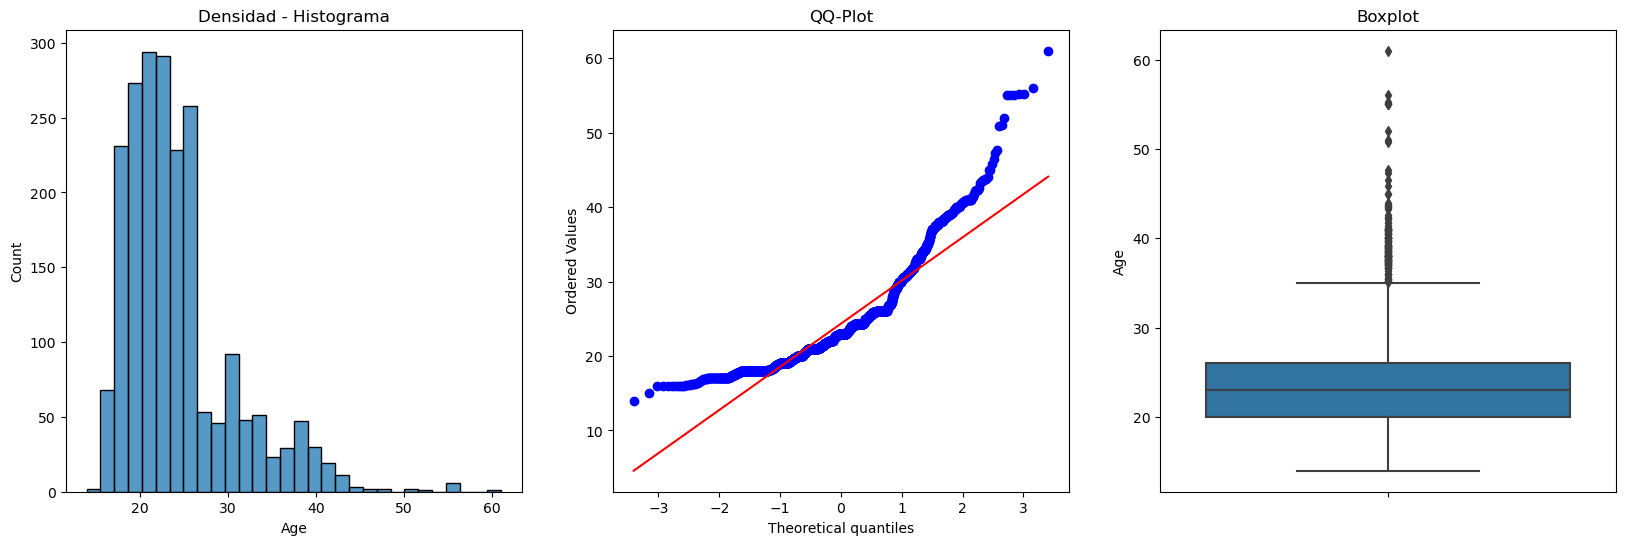

Height


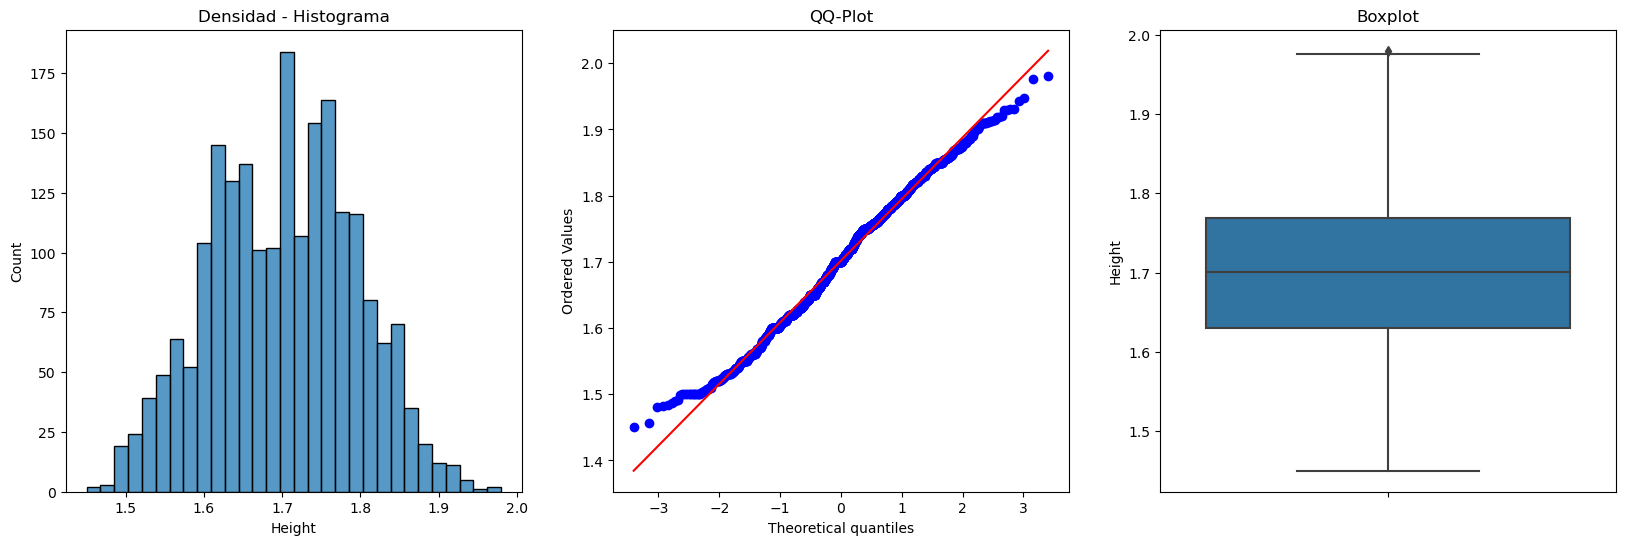

Weight


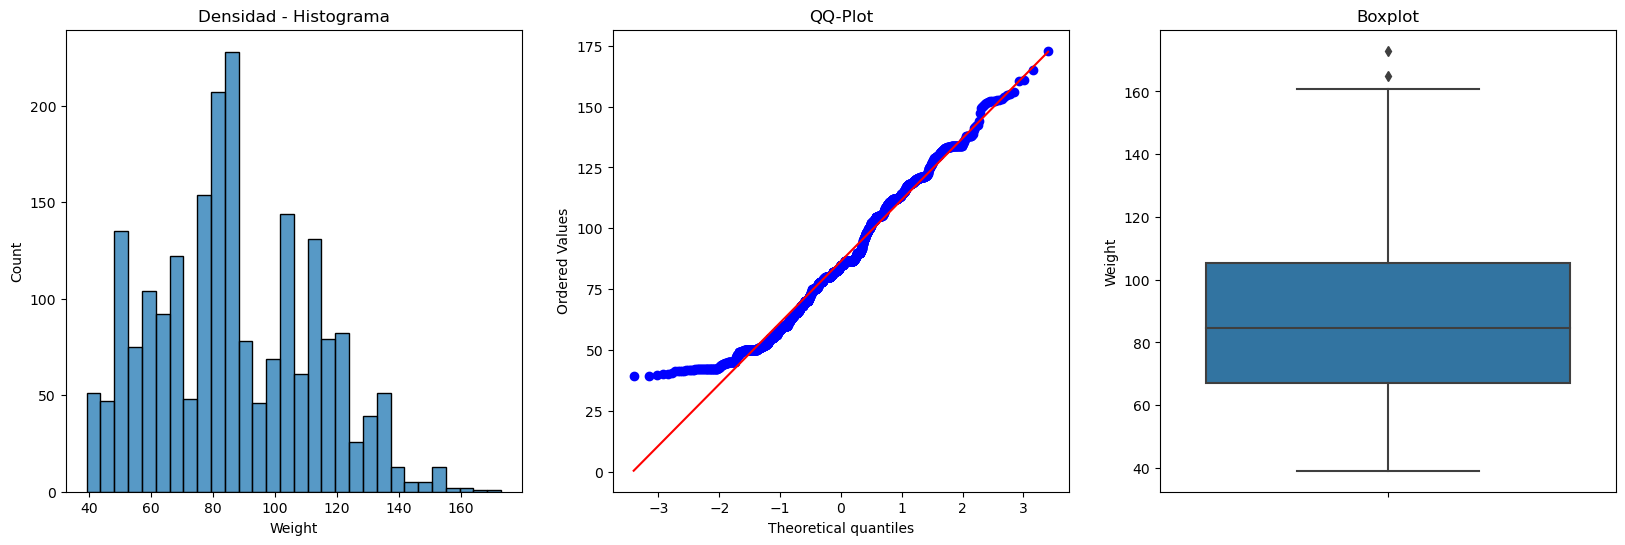

FCVC


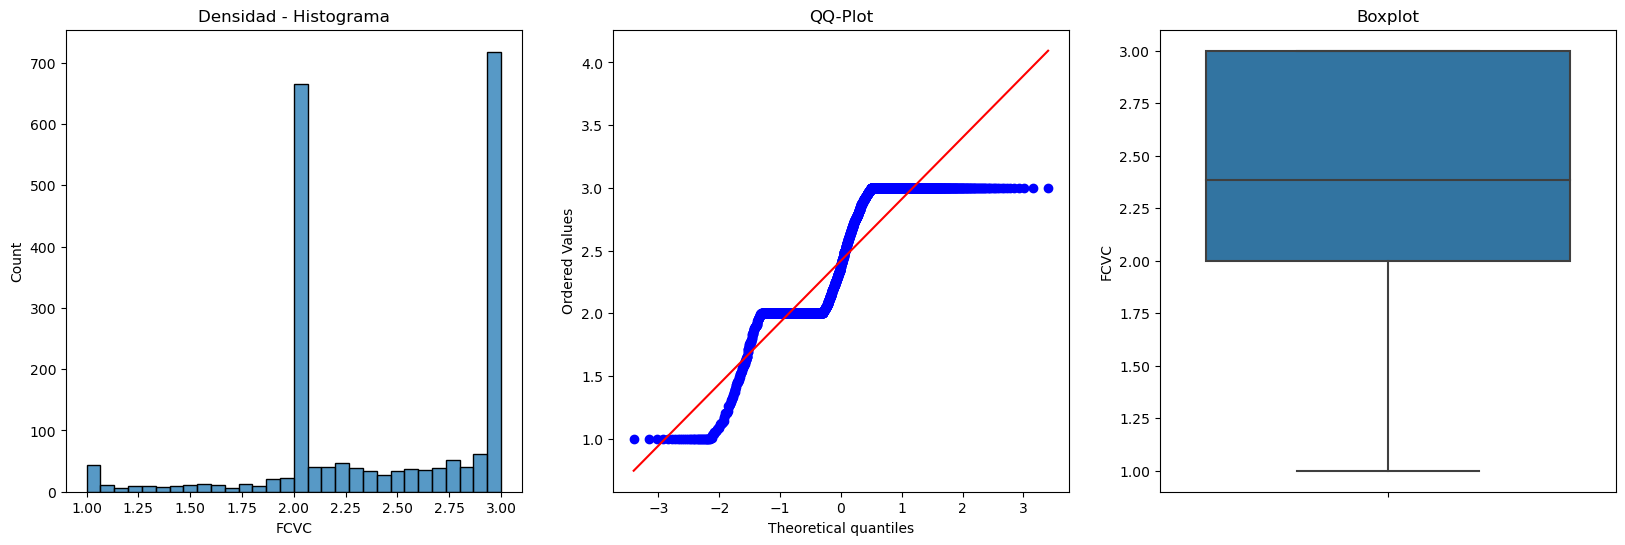

NCP


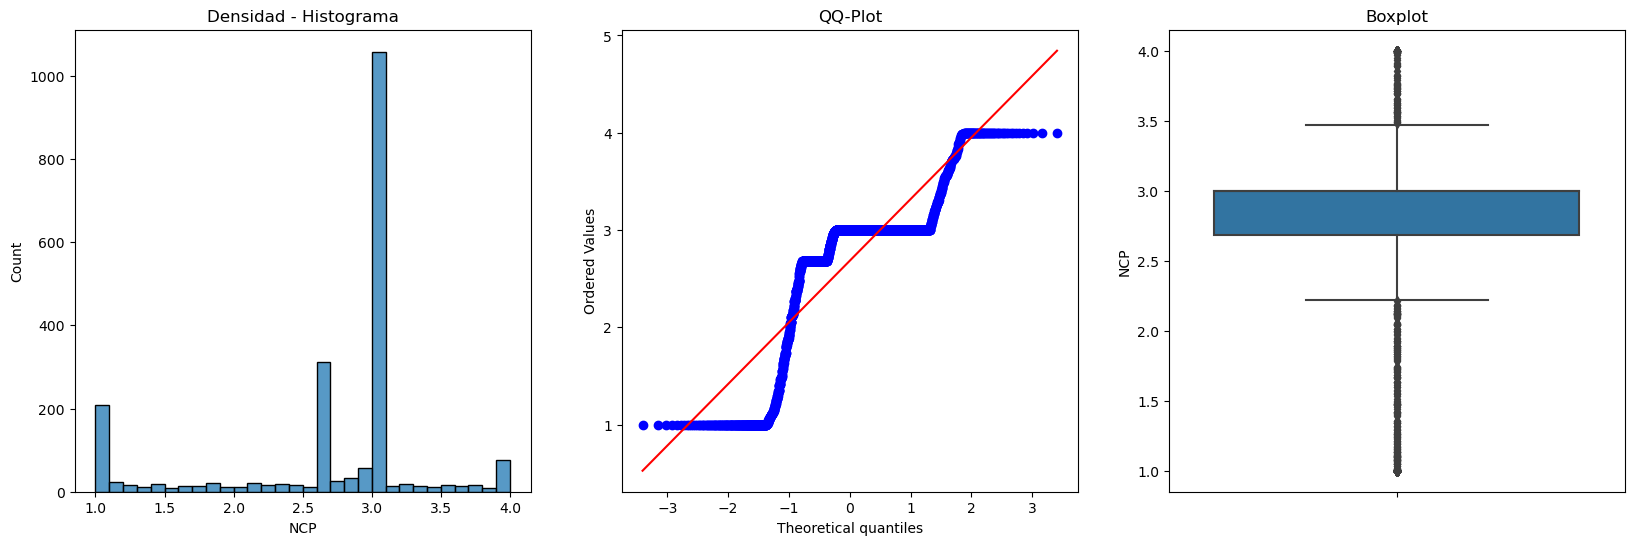

CH2O


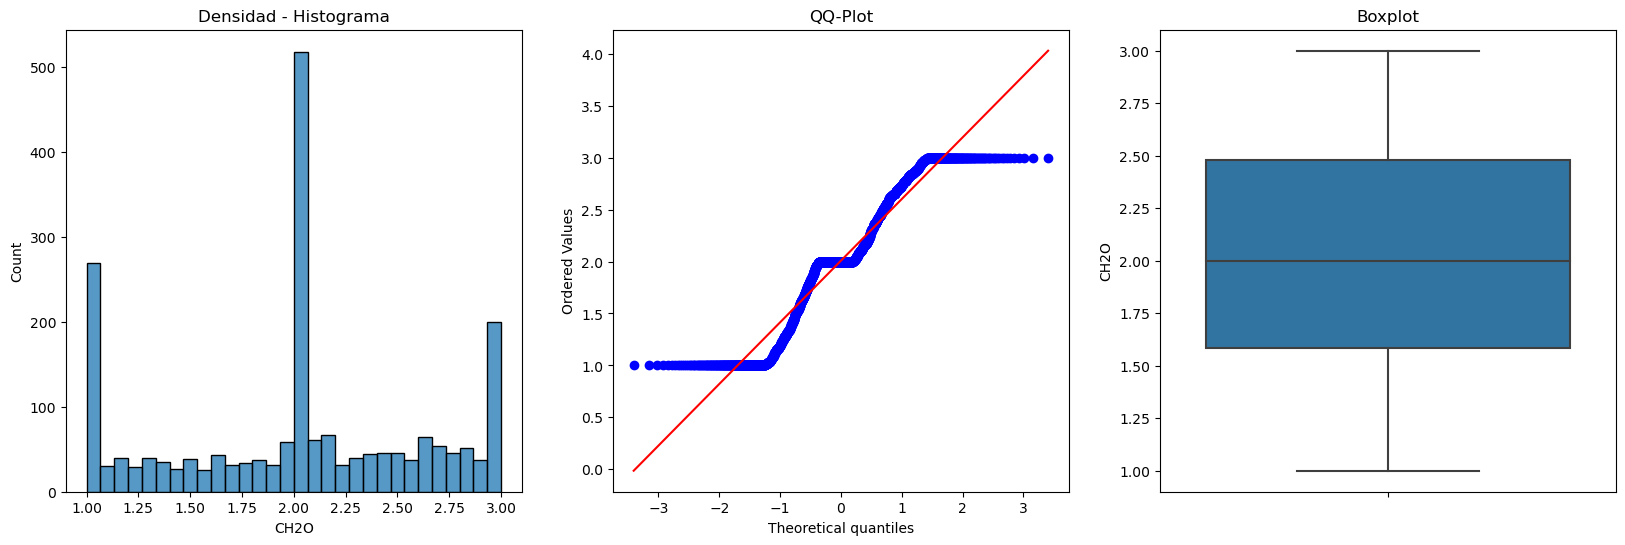

FAF


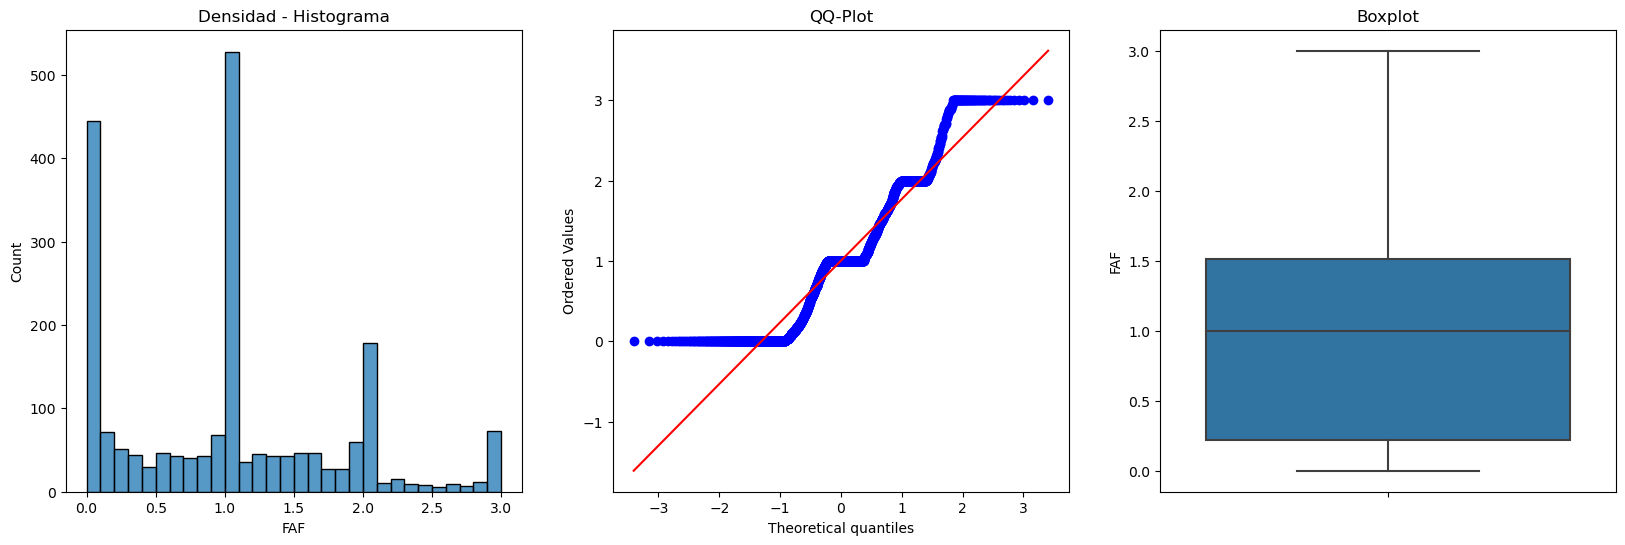

TUE


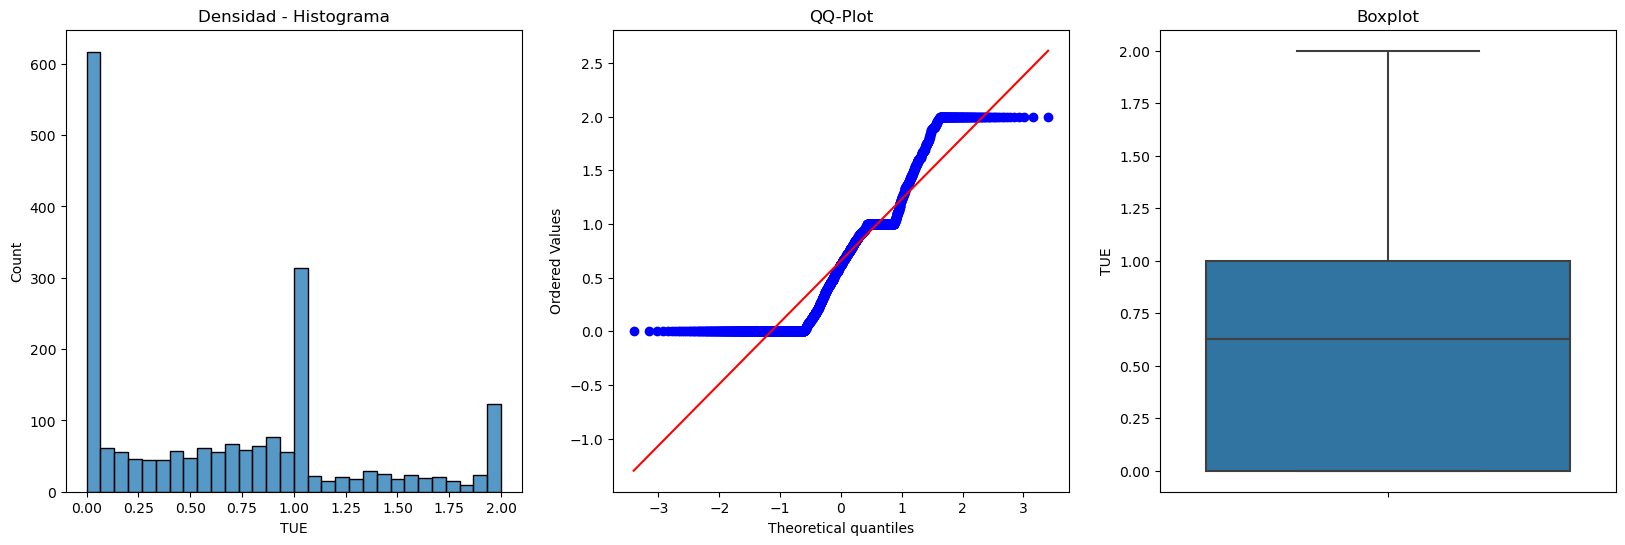

In [93]:
for col in cont:
    plot_outliers_analysis(proyecto_data_media, col)

In [94]:
#Tratamiento de Outliers con el metodo Capping
proyecto_data_cap = proyecto_data_media.copy()

In [95]:
#Obtener limite superior e inferior
def get_outliers_limits(dataset,col):
    IQR = proyecto_data_cap[col].quantile(0.75) - proyecto_data_cap[col].quantile(0.25)
    LI = proyecto_data_cap[col].quantile(0.25) - (1.5*IQR)
    LS = proyecto_data_cap[col].quantile(0.75) + (1.5*IQR)
    return LI, LS

In [96]:
for col in cont:
    LI, LS = get_outliers_limits(proyecto_data_cap, col)

    proyecto_data_cap[col] = np.where(proyecto_data_cap[col] > LS, LS, 
         np.where(proyecto_data_cap[col] < LI, LI, 
         proyecto_data_cap[col]))

Age


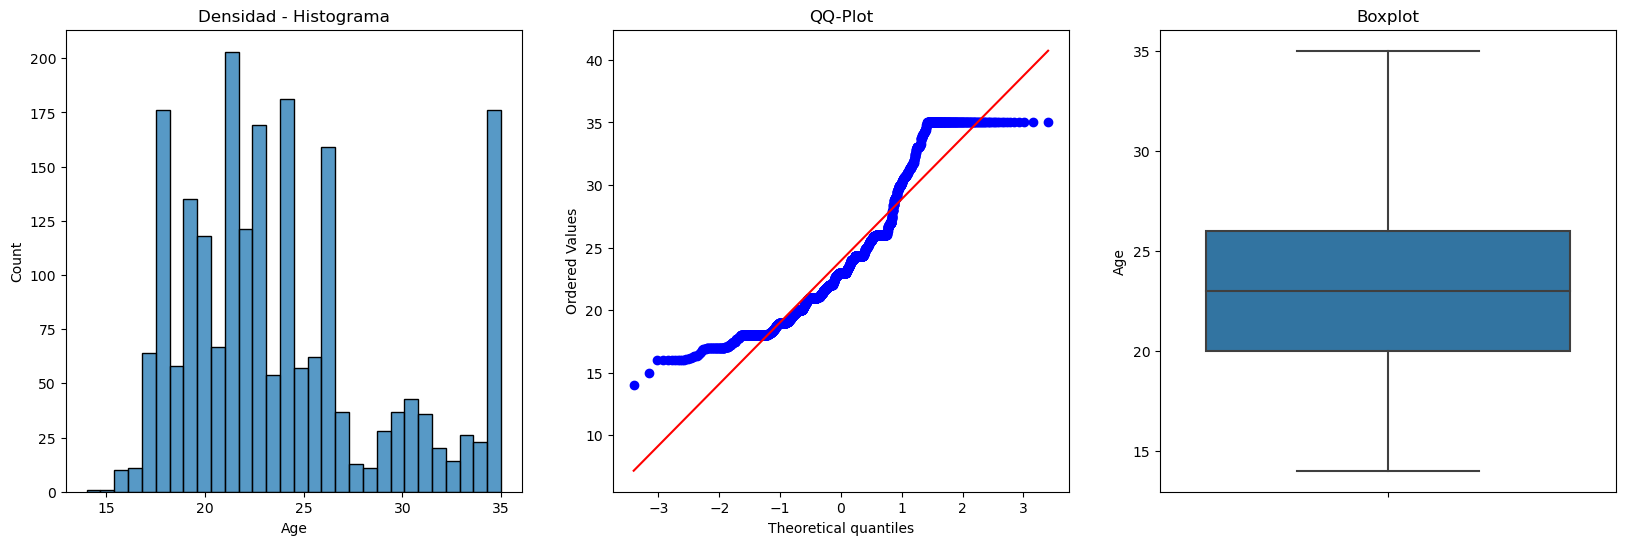

Height


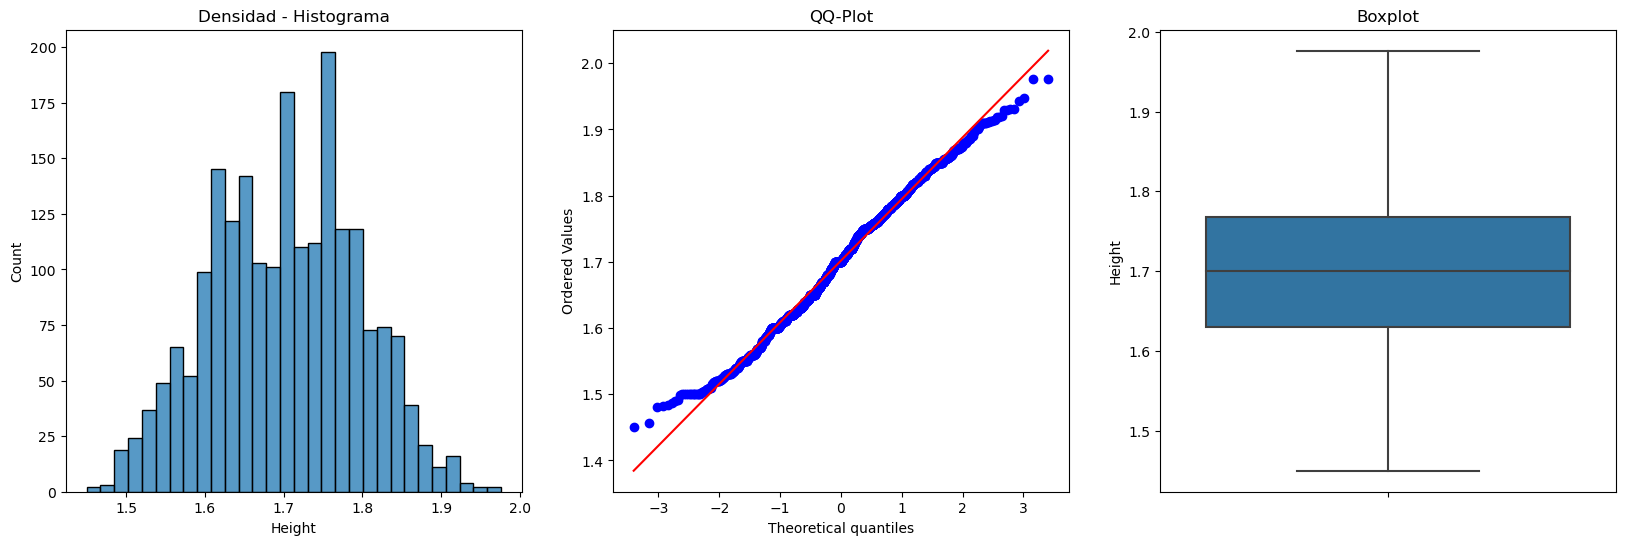

Weight


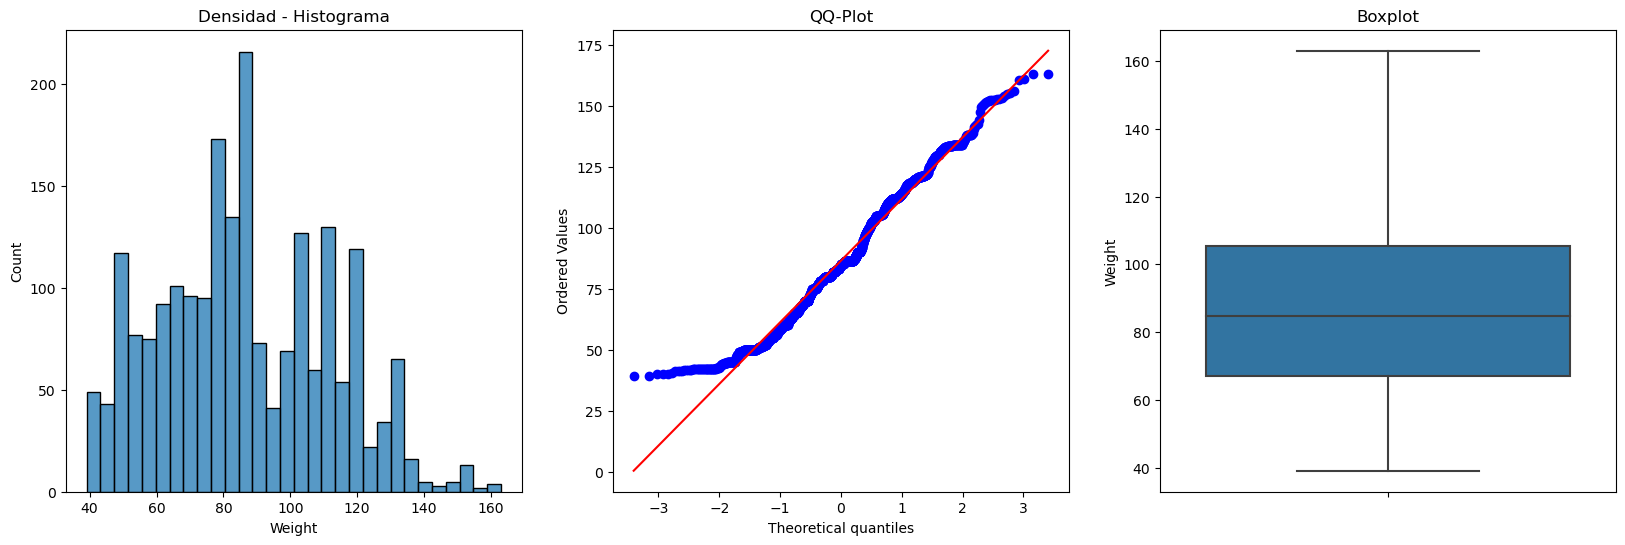

FCVC


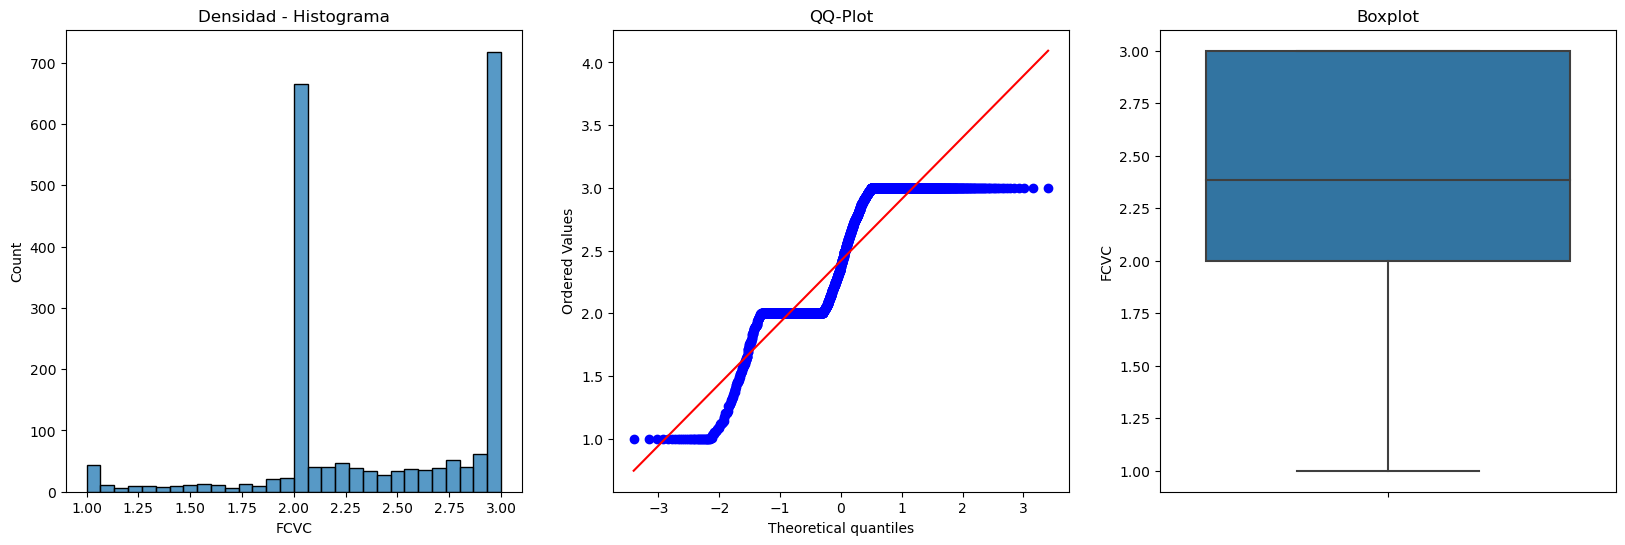

NCP


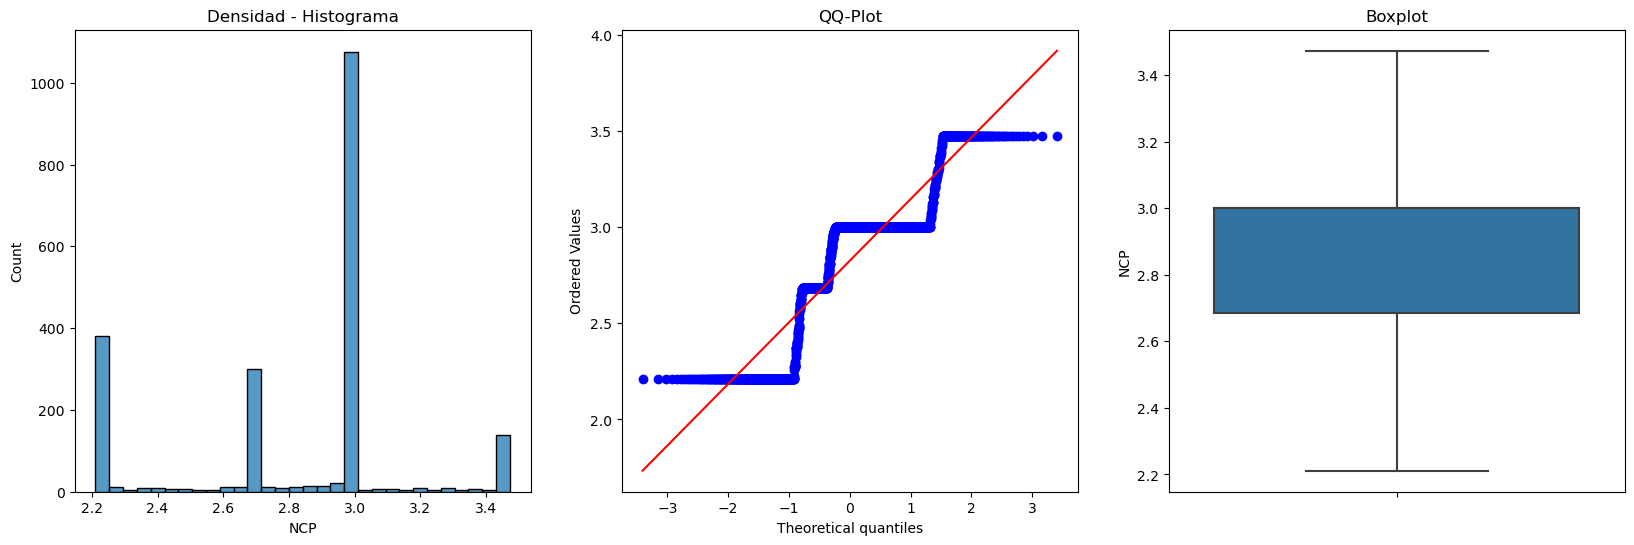

CH2O


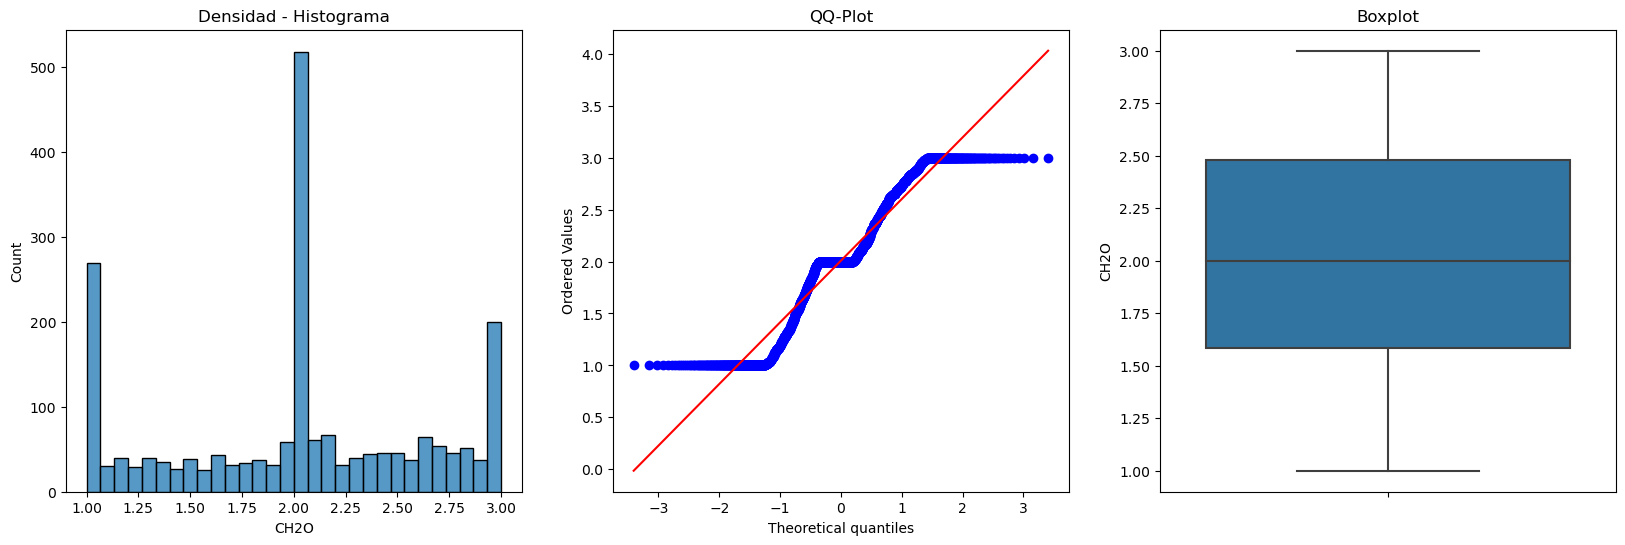

FAF


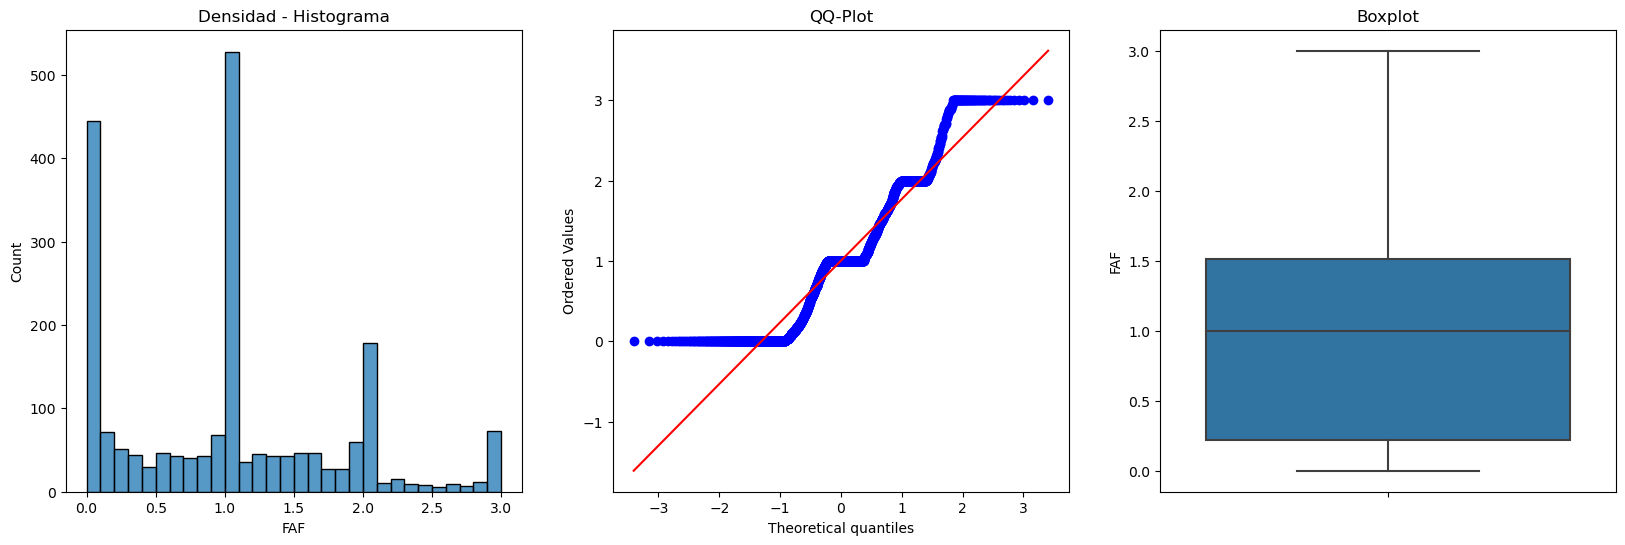

TUE


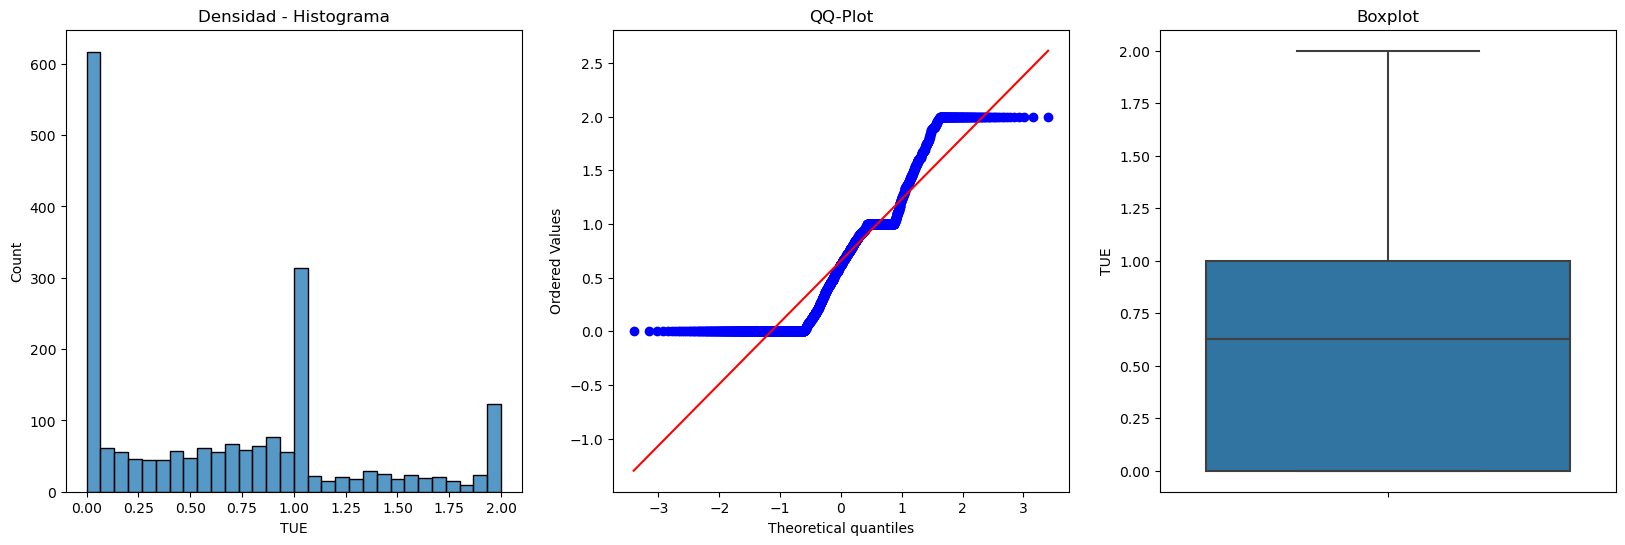

In [97]:
for col in cont:
    plot_outliers_analysis(proyecto_data_cap, col)

d. Transformación de variables numéricas

In [98]:
#Funcion para visualizar la distribucion de las variables categoricas
def plot_density_qq(df, variable):
    plt.figure(figsize = (8, 3))
    plt. subplot(121)
    df[variable].hist(bins = 30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()


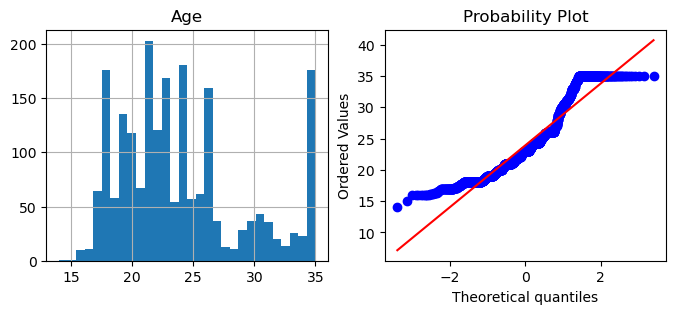

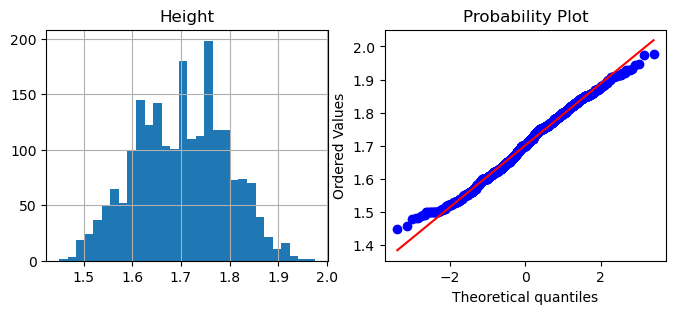

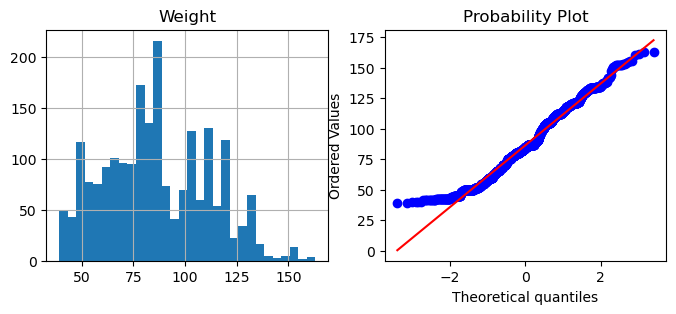

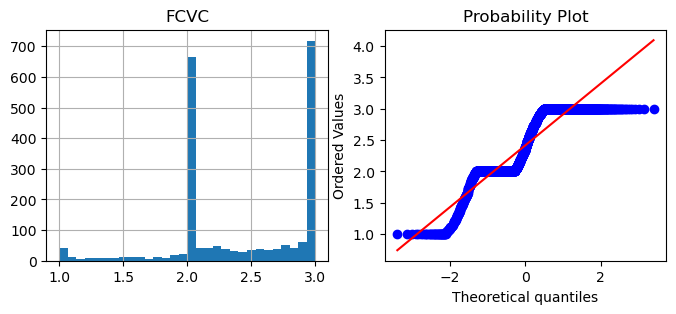

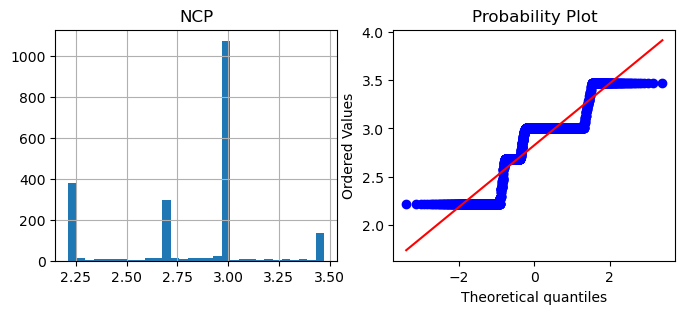

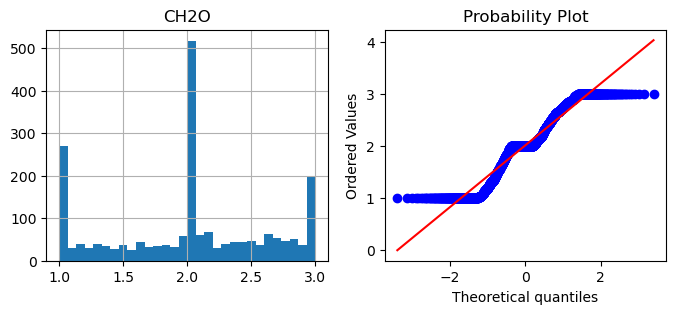

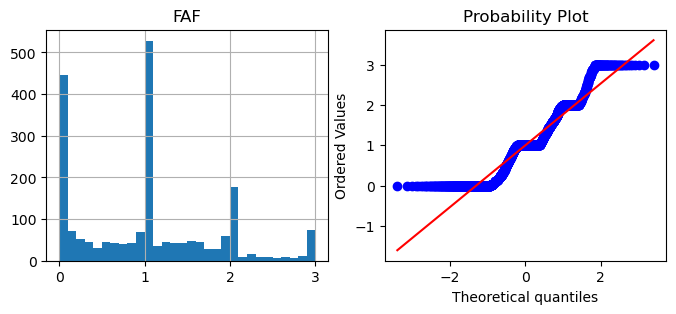

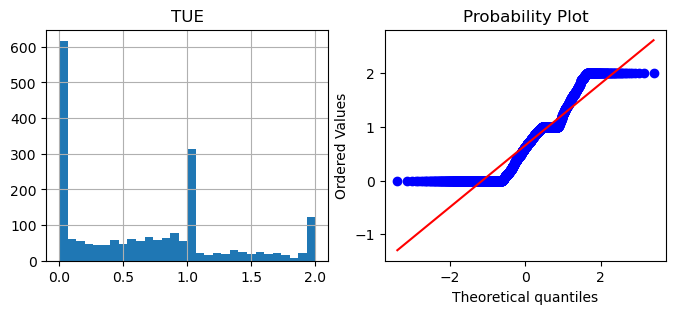

In [99]:
for col in cont:
    plot_density_qq(proyecto_data_cap, col)

- Transformacion Logaritmica

In [100]:
proyecto_data_log = proyecto_data_cap.copy()

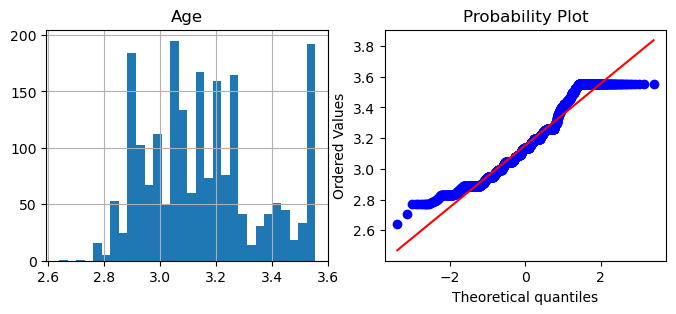

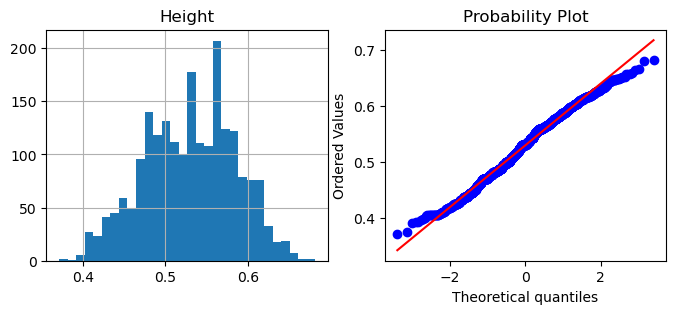

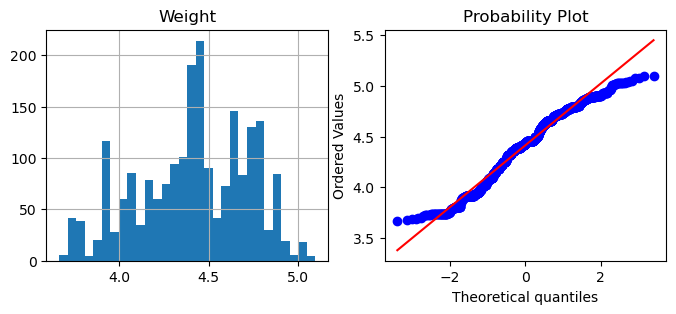

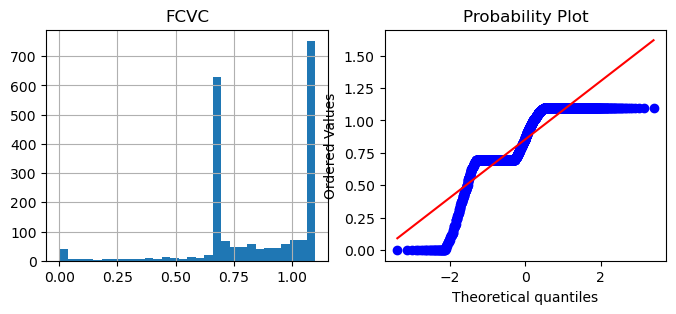

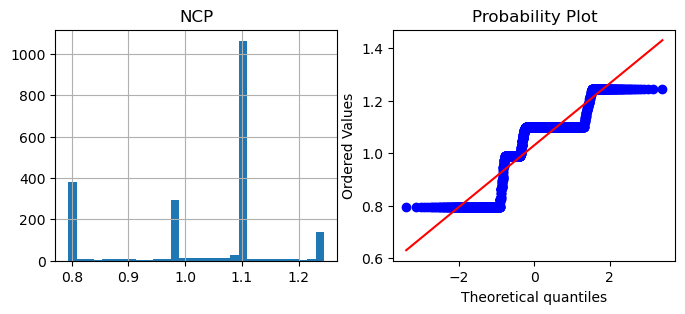

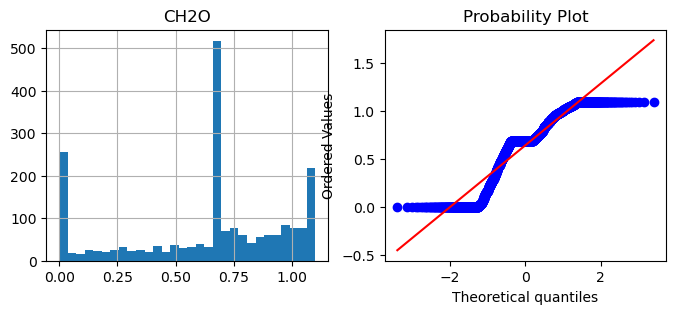

Advertencia: La columna 'FAF' contiene valores <= 0. Saltando transformación logarítmica para esta columna.
Advertencia: La columna 'TUE' contiene valores <= 0. Saltando transformación logarítmica para esta columna.


In [101]:
for col in cont:
    if col in proyecto_data_log.columns:
        if (proyecto_data_log[col] <= 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores <= 0. Saltando transformación logarítmica para esta columna.")
            continue
        proyecto_data_log[col] = np.log(proyecto_data_log[col])
        plot_density_qq(proyecto_data_log, col)
        plt.show()

- Transformacion Polinomial

In [102]:
proyecto_data_poli = proyecto_data_cap.copy()

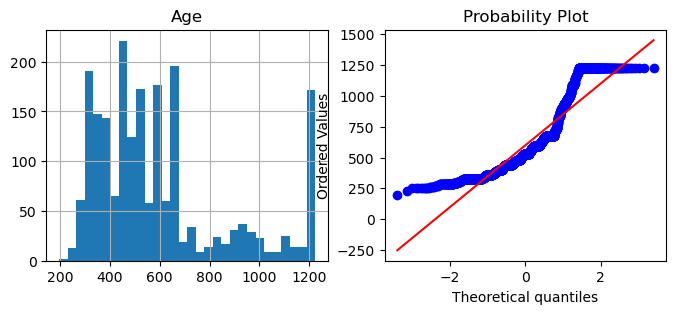

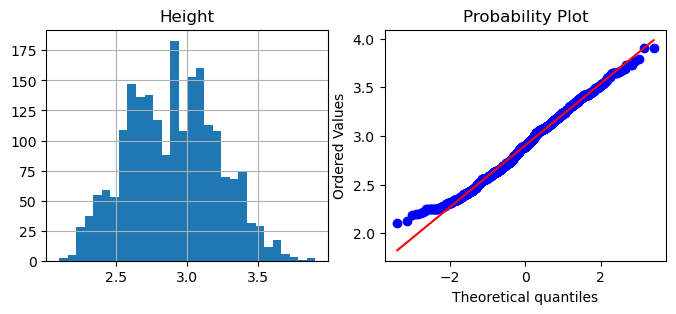

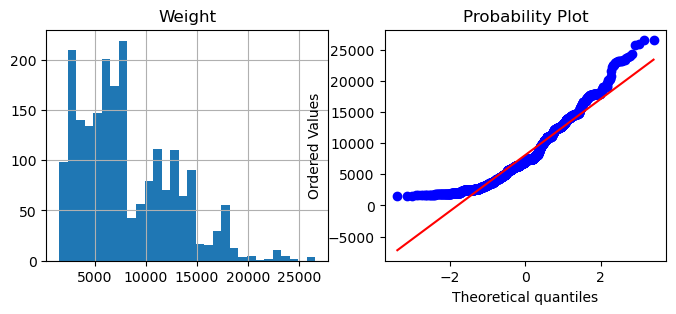

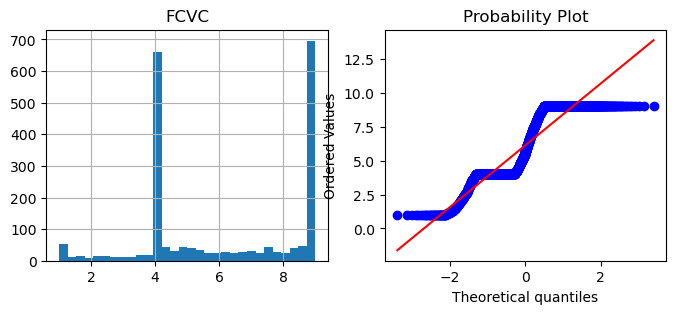

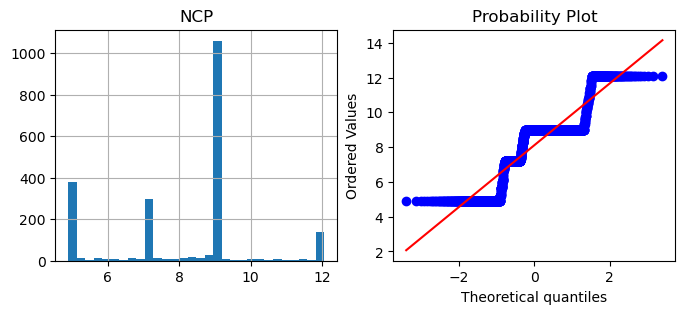

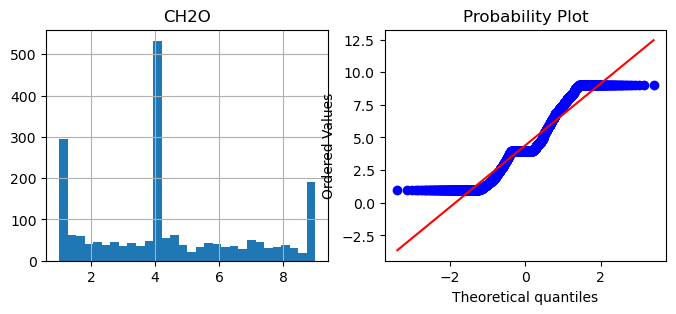

Advertencia: La columna 'FAF' contiene valores igual a 0. Saltando transformación polinomial para esta columna.
Advertencia: La columna 'TUE' contiene valores igual a 0. Saltando transformación polinomial para esta columna.


In [103]:
for col in cont:
    if col in proyecto_data_poli.columns:
        if (proyecto_data_poli[col] == 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores igual a 0. Saltando transformación polinomial para esta columna.")
            continue
        proyecto_data_poli[col] = (proyecto_data_poli[col]) ** 2
        plot_density_qq(proyecto_data_poli, col)
        plt.show()

- Transformacion Exponencial

In [104]:
proyecto_data_expo = proyecto_data_cap.copy()

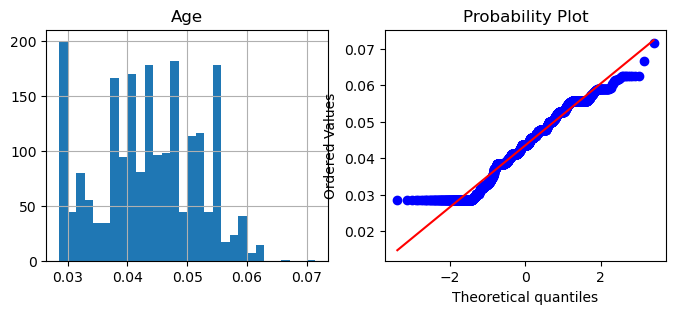

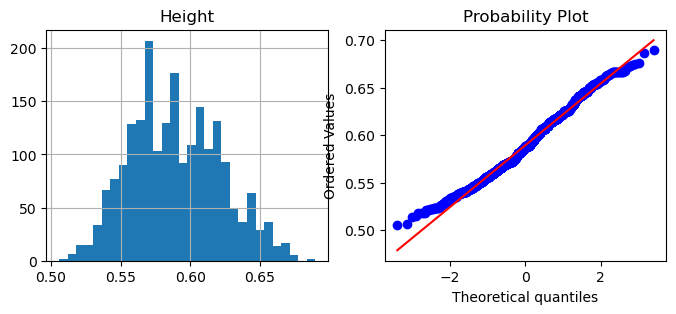

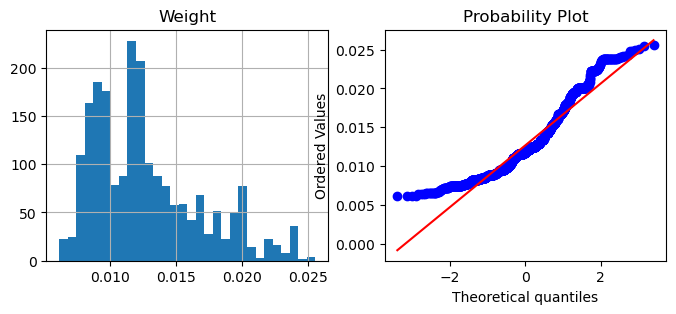

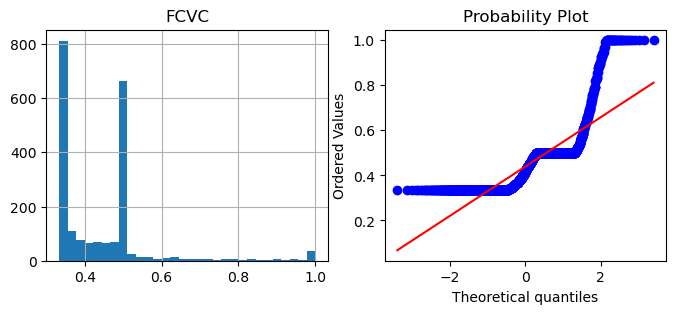

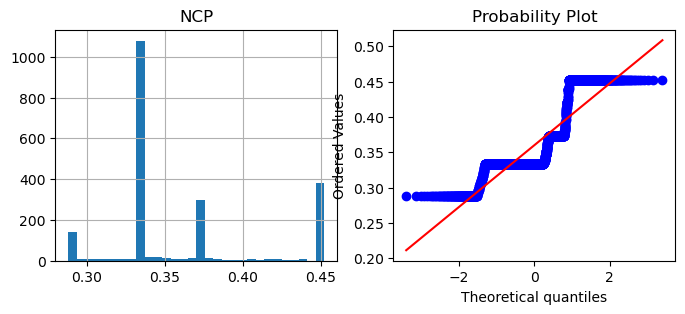

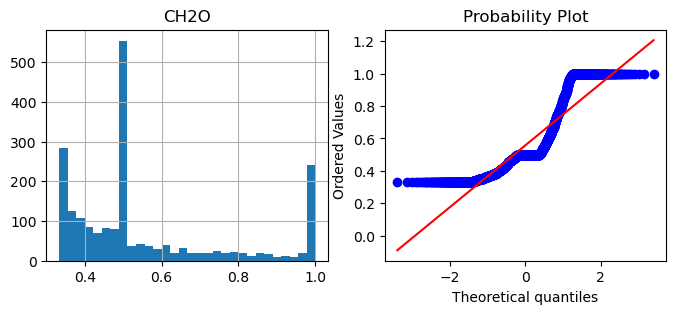

Advertencia: La columna 'FAF' contiene valores igual a 0. Saltando transformación inversa para esta columna.
Advertencia: La columna 'TUE' contiene valores igual a 0. Saltando transformación inversa para esta columna.


In [105]:
for col in cont:
    if col in proyecto_data_expo.columns:
        if (proyecto_data_expo[col] == 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores igual a 0. Saltando transformación inversa para esta columna.")
            continue
        proyecto_data_expo[col] = 1 / proyecto_data_expo[col]
        plot_density_qq(proyecto_data_expo, col)
        plt.show()

- Transformacion Box - Cox

In [106]:
proyecto_data_box = proyecto_data_cap.copy()

-1.0576


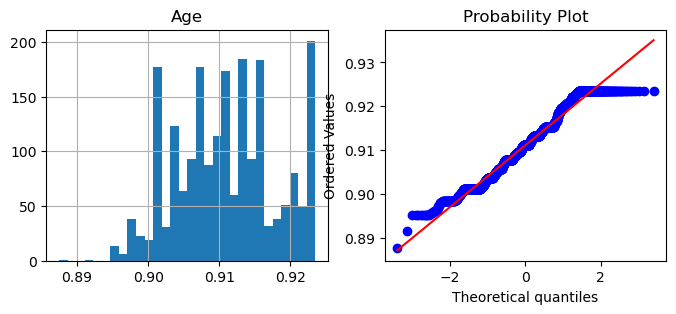

1.022


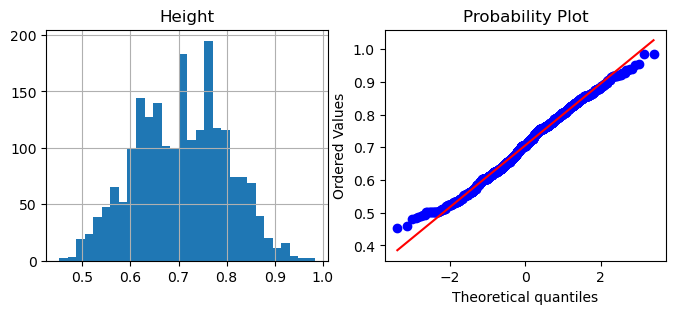

0.4697


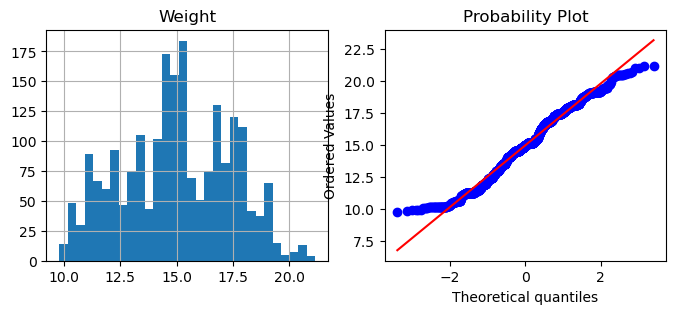

1.7177


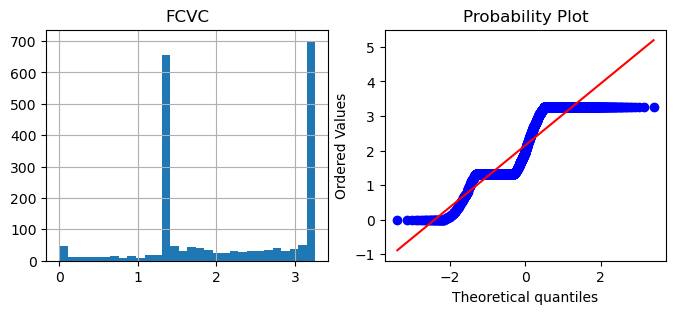

2.5796


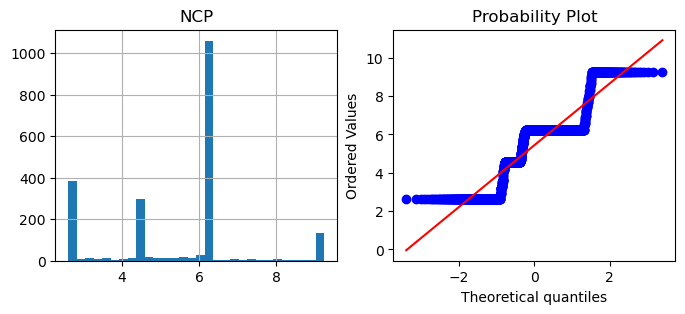

0.9923


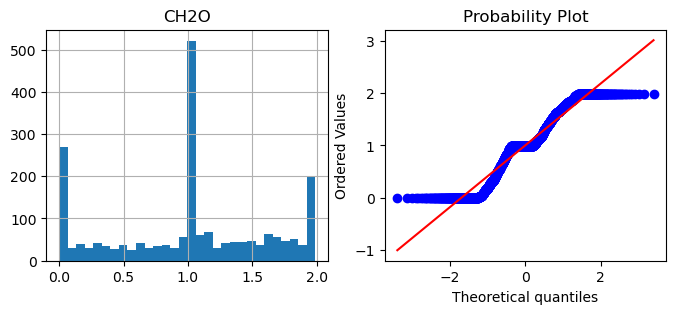

Advertencia: La columna 'FAF' contiene valores igual a 0. Saltando transformación box cox para esta columna.
Advertencia: La columna 'TUE' contiene valores igual a 0. Saltando transformación box cox para esta columna.


In [107]:
for col in cont:
    if col in proyecto_data_box.columns:
        if (proyecto_data_box[col] == 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores igual a 0. Saltando transformación box cox para esta columna.")
            continue
        proyecto_data_box[col], lmbd= stats.boxcox(proyecto_data_box[col])
        lmbd = str(round(lmbd,4))
        print(lmbd)
        plot_density_qq(proyecto_data_box, col)
        plt.show()

- Transformacion Yeo-Johnson

In [108]:
proyecto_data_yeo = proyecto_data_cap.copy()

-1.1392


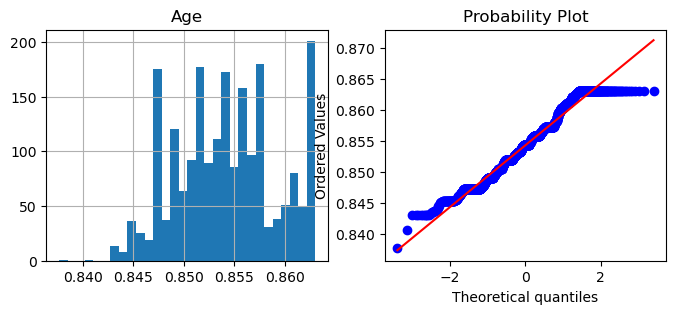

1.0835


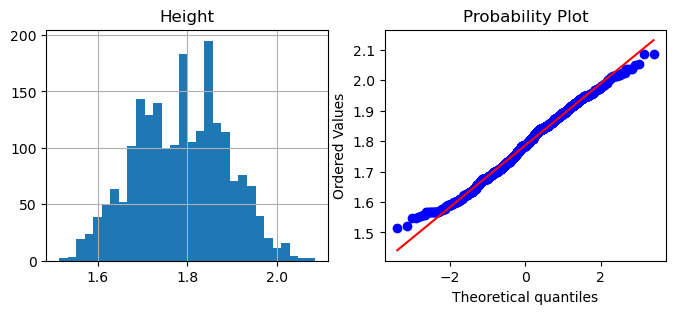

0.4645


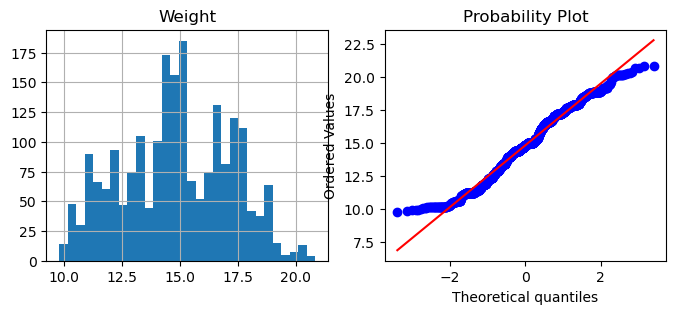

2.1784


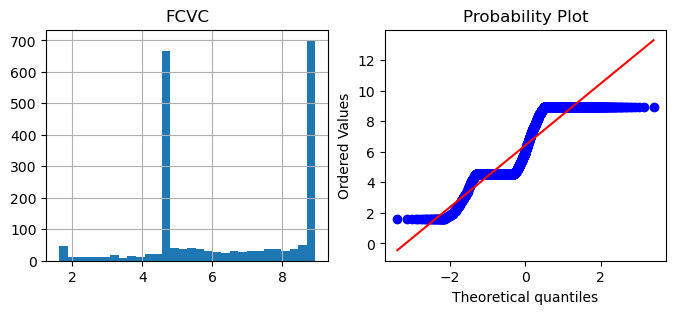

3.178


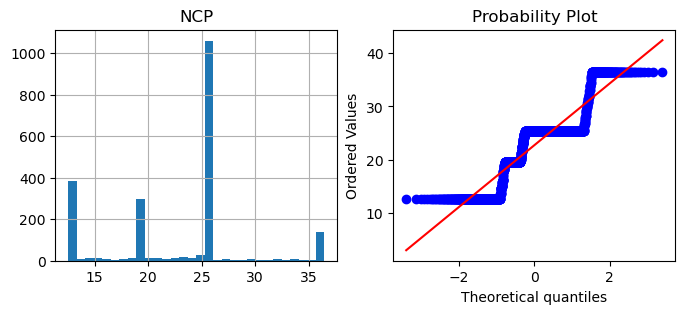

1.0935


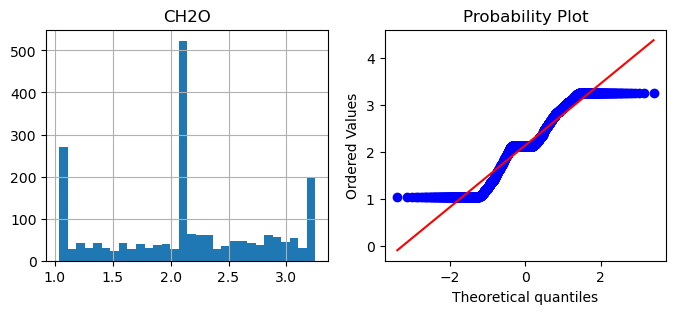

Advertencia: La columna 'FAF' contiene valores igual a 0. Saltando transformación yeo-johnson para esta columna.
Advertencia: La columna 'TUE' contiene valores igual a 0. Saltando transformación yeo-johnson para esta columna.


In [109]:
for col in cont:
    if col in proyecto_data_yeo.columns:
        if (proyecto_data_yeo[col] == 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores igual a 0. Saltando transformación yeo-johnson para esta columna.")
            continue
        proyecto_data_yeo[col], lmbd= stats.yeojohnson(proyecto_data_yeo[col])
        lmbd = str(round(lmbd,4))
        print(lmbd)
        plot_density_qq(proyecto_data_yeo, col)
        plt.show()

Derivado del analisis de las transformaciones anteriores, la del metodo logaritmico es la mas adecuada.

In [110]:
proyecto_data_log.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,3.044522,283,0.482426,4.158883,639,238,0.693147,0.987476,2015,2067,0.693147,1726,1.003579,1.0,1765,1495,287
1,3.044522,912,0.418710,4.025352,1401,238,1.098612,1.098612,96,44,1.098612,1726,3.000000,0.0,1765,1495,287
2,3.135494,916,0.587787,4.343805,70,238,0.693147,1.098612,2015,2067,0.693147,1726,2.000000,1.0,1765,1495,287
3,3.295837,283,0.587787,4.465908,70,238,1.098612,0.987476,2015,2067,0.693147,385,1.003579,0.0,1765,55,290
4,3.091042,916,0.576613,4.497585,1401,238,0.693147,0.793502,2015,2067,0.693147,385,0.000000,0.0,1765,1495,290


e. Estandarización de variables

In [111]:
data_scalling =proyecto_data_log
data_scalling.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,3.044522,283,0.482426,4.158883,639,238,0.693147,0.987476,2015,2067,0.693147,1726,1.003579,1.0,1765,1495,287
1,3.044522,912,0.418710,4.025352,1401,238,1.098612,1.098612,96,44,1.098612,1726,3.000000,0.0,1765,1495,287
2,3.135494,916,0.587787,4.343805,70,238,0.693147,1.098612,2015,2067,0.693147,1726,2.000000,1.0,1765,1495,287
3,3.295837,283,0.587787,4.465908,70,238,1.098612,0.987476,2015,2067,0.693147,385,1.003579,0.0,1765,55,290
4,3.091042,916,0.576613,4.497585,1401,238,0.693147,0.793502,2015,2067,0.693147,385,0.000000,0.0,1765,1495,290


In [112]:
continuas = [col for col in data_scalling.columns if (data_scalling[col].dtype in ['float64', 'int64']) and (len(data_scalling[col].unique())> 30)]
continuas

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [113]:
# escalado de variables continuas
for col in continuas:
    if col in data_scalling.columns:
        min_val = data_scalling[col].min()
        max_val = data_scalling[col].max()
    data_scalling[col] = (data_scalling[col] - min_val) / (max_val - min_val)

In [114]:
data_scalling.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.442507,283,0.358093,0.345082,639,238,0.63093,0.429517,2015,2067,0.63093,1726,0.334526,0.5,1765,1495,287
1,0.442507,912,0.152287,0.251561,1401,238,1.00000,0.675605,96,44,1.00000,1726,1.000000,0.0,1765,1495,287
2,0.541790,916,0.698413,0.474596,70,238,0.63093,0.675605,2015,2067,0.63093,1726,0.666667,0.5,1765,1495,287
3,0.716781,283,0.698413,0.560113,70,238,1.00000,0.429517,2015,2067,0.63093,385,0.334526,0.0,1765,55,290
4,0.493277,916,0.662323,0.582299,1401,238,0.63093,0.000000,2015,2067,0.63093,385,0.000000,0.0,1765,1495,290
